# Introduction

This goal of this project is to analyze biodiversity data from the National Parks Service, particularly around various species observed in different national park locations.

This project will scope, analyze, prepare, plot data, and seek to explain the findings from the analysis.

Here are a few questions that this project has sought to answer:

- What is the distribution of conservation status for species?
- Are certain types of species more likely to be endangered?
- Are the differences between species and their conservation status significant?
- Which animal is most prevalent and what is their distribution amongst parks?

**Data sources:**

Both `Observations.csv` and `Species_info.csv` was provided by [Codecademy.com](https://www.codecademy.com).

Note: The data for this project is *inspired* by real data, but is mostly fictional.stly fictional.

In [30]:
## Import Python Libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

#### species

The `species_info.csv` contains information on the different species in the National Parks. The columns in the data set include:
- **category** - The category of taxonomy for each species
- **scientific_name** - The scientific name of each species
- **common_names** - The common names of each species
- **conservation_status** - The species conservation statusstatus

In [31]:
species = pd.read_csv('species_info.csv',encoding='utf-8')
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


#### observations

The `Observations.csv` contains information from recorded sightings of different species throughout the national parks in the past 7 days. The columns included are:

- **scientific_name** - The scientific name of each species
- **park_name** - The name of the national park
- **observations** - The number of observations in the past 7 days

In [33]:
observations = pd.read_csv('observations.csv',encoding='utf-8')
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


## Characteristics

Here we check the dimensions of the data sets. The species set has 5,824 rows of 4 columns. The observations set has 23,296 rows of 3 columns.

In [34]:
print(f"species shape: {species.shape}")
print(f"observations shape: {observations.shape}")

species shape: (5824, 4)
observations shape: (23296, 3)


#### Exploring the Data Sets

## species
Diving into the species data set more.  We find that there are 5,541 unique species by sorting unique items in the scientific_name column.

In [35]:
print(f"Number of Species: {species.scientific_name.nunique()}")

Number of Species: 5541


Next we find that there are 7 unique categories comprised of both plants and animals.

In [36]:
print(f"Number of categories: {species.category.nunique()}")
print(f"Categories: {species.category.unique()}")

Number of categories: 7
Categories: ['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


Now we can find the counts for each of the categories in the species dataset.

In [37]:
species.groupby("category").size()

category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64

In regards to conservation status, there are four categories:
1) Species of Concern
2) Endangered
3) Threatened
4) In Recovery
5) nan values

In [38]:
print(f"Number of conservation statuses: {species.conservation_status.nunique()}")
print(f"Conservation statuses: {species.conservation_status.unique()}")

Number of conservation statuses: 4
Conservation statuses: [nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


We can then sort by conservation statuses to find how many of each exist. The dataset has 5,633 nan values, or species which are without concern. 

Of the listed species we have 161 species of concern, 16 endangered species, 10 threatened species, and 4 species in recovery.

In [39]:
print(f"na values: {species.conservation_status.isna().sum()}")
print(species.groupby("conservation_status").size())

na values: 5633
conservation_status
Endangered             16
In Recovery             4
Species of Concern    161
Threatened             10
dtype: int64


## observations
Now we will explore our observations dataset. Starting with the parks, we find that we only include 4 of the national parks across the country.

In [40]:
print(f"Number of parks: {observations.park_name.nunique()}")
print(f"Parks: {observations.park_name.unique()}")

Number of parks: 4
Parks: ['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


Our data set only includes observations for the last 7 days.  However, we have a total of 3,314,739 observations!

In [41]:
print(f"Number of observations: {observations.observations.sum()}")

Number of observations: 3314739


#### Analysis
Now we can clean the data sets and begin analysis.

Starting with conservation_status in species.
We can change our nan values to "No Concerns".

In [42]:
species.fillna('No Concerns', inplace=True)
species.groupby("conservation_status").size()

conservation_status
Endangered              16
In Recovery              4
No Concerns           5633
Species of Concern     161
Threatened              10
dtype: int64

We can dig deeper into which categories of plant and animal fall under which conservation statuses.

We see here that there are 3 birds and 1 mammal In Recovery while there are 7 mammals and 4 birds in Endangered status.

In [43]:
conservationCategory = species[species.conservation_status != "No Intervention"]\
    .groupby(["conservation_status", "category"])['scientific_name']\
    .count()\
    .unstack()

conservationCategory

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
No Concerns,73.0,442.0,116.0,176.0,328.0,74.0,4424.0
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


<Figure size 800x600 with 0 Axes>

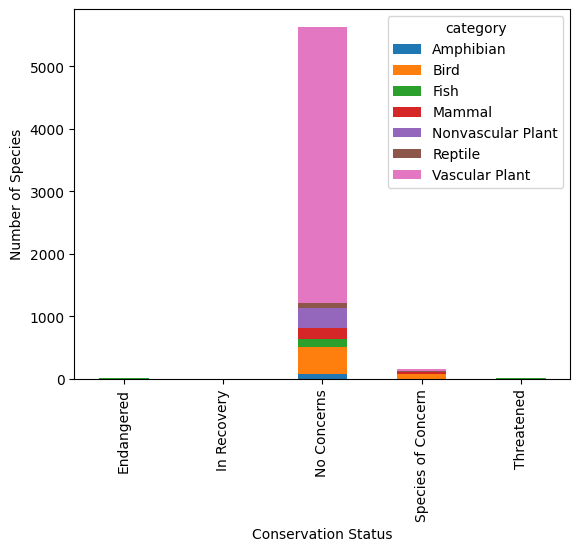

In [44]:
plt.figure(figsize=(8,6))
ax = conservationCategory.plot(kind='bar', stacked=True)
ax.set_xlabel("Conservation Status")
ax.set_ylabel("Number of Species")
plt.show()

## In conservation
Here we create a new column to help us calculate percentages of each category which are protected or not.  

In [49]:
species['is_protected'] = species.conservation_status != 'No Concerns'

In [51]:
category_counts = species.groupby(['category', 'is_protected'])\
                        .scientific_name.nunique()\
                        .reset_index()\
                        .pivot(columns='is_protected',
                                      index='category',
                                      values='scientific_name')\
                        .reset_index()
category_counts.columns = ['category', 'not_protected', 'protected']

category_counts

,category,not_protected,protected
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


By calculating percentages of each category which are protected. We can see that around 17% of our mammals and 15% of birds are in protection.

In [53]:
category_counts['percent_protected'] = category_counts.protected / \
                    (category_counts.protected + category_counts.not_protected) * 100
category_counts

,category,not_protected,protected,percent_protected
0,Amphibian,72,7,8.860759
1,Bird,413,75,15.368852
2,Fish,115,11,8.730159
3,Mammal,146,30,17.045455
4,Nonvascular Plant,328,5,1.501502
5,Reptile,73,5,6.410256
6,Vascular Plant,4216,46,1.079305


Comparing mammal and bird protection rates.  We find a p-value of 0.687 which is higher than our p-value of 0.05 to test statistical significance.  This shows us that mammals and birds there is no significant relationship.

In [55]:
from scipy.stats import chi2_contingency

contingency1 = [[30, 146],
              [75, 413]]
chi2_contingency(contingency1)

Chi2ContingencyResult(statistic=np.float64(0.1617014831654557), pvalue=np.float64(0.6875948096661336), dof=1, expected_freq=array([[ 27.8313253, 148.1686747],
       [ 77.1686747, 410.8313253]]))

Comparing mammal and reptile. We find a p-value of 0.039 which is below 0.05.  Therefore we can conclude that mammals have a statistically significantly higher rate of protection than reptiles.

In [56]:
contingency2 = [[30, 146],
               [5, 73]]
chi2_contingency(contingency2)

Chi2ContingencyResult(statistic=np.float64(4.289183096203645), pvalue=np.float64(0.03835559022969898), dof=1, expected_freq=array([[ 24.2519685, 151.7480315],
       [ 10.7480315,  67.2519685]]))

## Species in Parks

Here we can look at common animals.

In [59]:
from itertools import chain
import string

def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

common_Names = species[species.category == "Mammal"]\
    .common_names\
    .apply(remove_punctuations)\
    .str.split().tolist()

common_Names[:6]

[['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison', 'Bison'],
 ['Aurochs',
  'Aurochs',
  'Domestic',
  'Cattle',
  'Feral',
  'Domesticated',
  'Cattle'],
 ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Sheep', 'Sheep', 'Feral'],
 ['Wapiti', 'Or', 'Elk'],
 ['WhiteTailed', 'Deer']]

Now to remove duplicate species as well as collapse into a single list.

In [62]:
cleanRows = []

for item in common_Names:
    item = list(dict.fromkeys(item))
    cleanRows.append(item)

res = list(chain.from_iterable(i if isinstance(i, list) else [i] for i in cleanRows))
res[:6]

['Gappers', 'RedBacked', 'Vole', 'American', 'Bison', 'Aurochs']

Now to count the occurrences of each species.  We saw 23 Bats, 18 Shrew, and 17 Myotis.

In [63]:
words_counted = []

for i in res:
    x = res.count(i)
    words_counted.append((i,x))

pd.DataFrame(set(words_counted), columns =['Word', 'Count']).sort_values("Count", ascending = False).head(10)

,Word,Count
169,Bat,23
60,Shrew,18
121,Myotis,17
167,Mouse,16
145,Chipmunk,13
22,American,12
61,Squirrel,12
160,Vole,11
92,Eastern,11
81,Western,10


There exist multiple scientific names for bats. We can make a new column to see which are bats.

In [67]:
species['is_bat'] = species.common_names.str.contains(r"\bBat\b", regex = True)


In [68]:
species[species.is_bat]

,category,scientific_name,common_names,conservation_status,is_protected,is_bat
28,Mammal,Corynorhinus rafinesquii,Rafinesque's Big-Eared Bat,No Concerns,False,True
29,Mammal,Eptesicus fuscus,Big Brown Bat,Species of Concern,True,True
30,Mammal,Lasionycteris noctivagans,Silver-Haired Bat,Species of Concern,True,True
31,Mammal,Lasiurus borealis,"Eastern Red Bat, Red Bat",No Concerns,False,True
32,Mammal,Lasiurus cinereus,Hoary Bat,No Concerns,False,True
36,Mammal,Myotis leibii,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
37,Mammal,Myotis lucifugus,"Little Brown Bat, Little Brown Myotis",Species of Concern,True,True
38,Mammal,Myotis septentrionalis,"Northern Long-Eared Bat, Northern Myotis",Threatened,True,True
39,Mammal,Myotis sodalis,"Indiana Bat, Indiana Or Social Myotis",Endangered,True,True
40,Mammal,Nycticeius humeralis,Evening Bat,No Concerns,False,True


In [69]:
bat_observations = observations.merge(species[species.is_bat])
bat_observations

,scientific_name,park_name,observations,category,common_names,conservation_status,is_protected,is_bat
0,Lasiurus blossevillii,Bryce National Park,113,Mammal,Western Red Bat,Species of Concern,True,True
1,Corynorhinus rafinesquii,Yosemite National Park,188,Mammal,Rafinesque's Big-Eared Bat,No Concerns,False,True
2,Nycticeius humeralis,Yellowstone National Park,219,Mammal,Evening Bat,No Concerns,False,True
3,Lasiurus blossevillii,Great Smoky Mountains National Park,70,Mammal,Western Red Bat,Species of Concern,True,True
4,Lasiurus borealis,Yosemite National Park,134,Mammal,"Eastern Red Bat, Red Bat",No Concerns,False,True
...,...,...,...,...,...,...,...,...
139,Eptesicus fuscus,Bryce National Park,72,Mammal,Big Brown Bat,Species of Concern,True,True
140,Eptesicus fuscus,Bryce National Park,72,Mammal,"Big Brown Bat, Big Brown Bat",Species of Concern,True,True
141,Myotis leibii,Yellowstone National Park,233,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
142,Lasionycteris noctivagans,Bryce National Park,128,Mammal,Silver-Haired Bat,Species of Concern,True,True


In [70]:
bat_observations.groupby('park_name').observations.sum().reset_index()

,park_name,observations
0,Bryce National Park,3433
1,Great Smoky Mountains National Park,2411
2,Yellowstone National Park,8362
3,Yosemite National Park,4786


In [71]:
obs_by_park = bat_observations.groupby(['park_name', 'is_protected']).observations.sum().reset_index()
obs_by_park

,park_name,is_protected,observations
0,Bryce National Park,False,1596
1,Bryce National Park,True,1837
2,Great Smoky Mountains National Park,False,1299
3,Great Smoky Mountains National Park,True,1112
4,Yellowstone National Park,False,4044
5,Yellowstone National Park,True,4318
6,Yosemite National Park,False,2345
7,Yosemite National Park,True,2441


Digging into the amount of bat observations weekly per park.

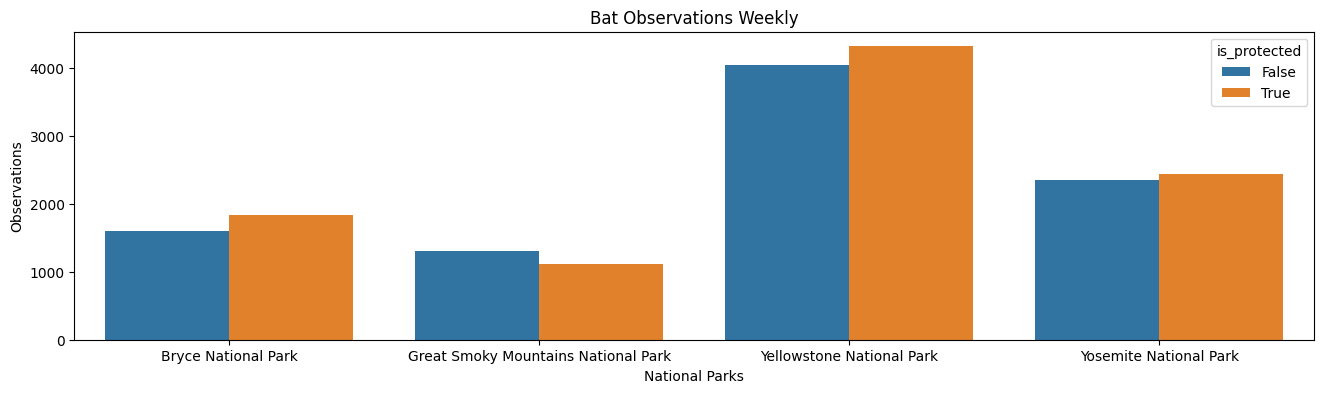

In [72]:
plt.figure(figsize=(16,4))
sns.barplot(x=obs_by_park.park_name, y=obs_by_park.observations, hue=obs_by_park.is_protected)
plt.xlabel('National Parks')
plt.ylabel('Observations')
plt.title('Bat Observations Weekly')
plt.show()

## Conclusions

The project was able to make several data visualizations and inferences about the various species in four of the National Parks that comprised this data set.

This project was also able to answer some of the questions first posed in the beginning:

- What is the distribution of conservation status for species?
    - The vast majority of species were not part of conservation.(5,633 vs 191)
- Are certain types of species more likely to be endangered?
    - Mammals and Birds had the highest percentage of being in protection.
- Are the differences between species and their conservation status significant?
    - While mammals and Birds did not have significant difference in conservation percentage, mammals and reptiles exhibited a statistically significant difference.
- Which animal is most prevalent and what is their distribution amongst parks?
    - the study found that bats occurred the most number of times and they were most likely to be found in Yellowstone National Park.


## Further Research 

This dataset only included observations from the last 7 days which prohibits analyze changes over time. It would be curious to see how the conservation status for various species changes over time. Another piece that is missing is the Area of each park, it can be assumed that Yellowstone National Park might be much larger than the other parks which would mean that it would exhibit more observations and greater biodiversity. Lastly, if precise locations were recorded, the spatial distribution of the species could also be observed and test if these observations are spatially clustered. 